In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/gdrive/MyDrive/autism/train",
    validation_split=0.6,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/gdrive/MyDrive/autism/train",
    validation_split=0.4,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=1,
)

Found 2636 files belonging to 2 classes.
Using 1055 files for training.
Found 2636 files belonging to 2 classes.
Using 1054 files for validation.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


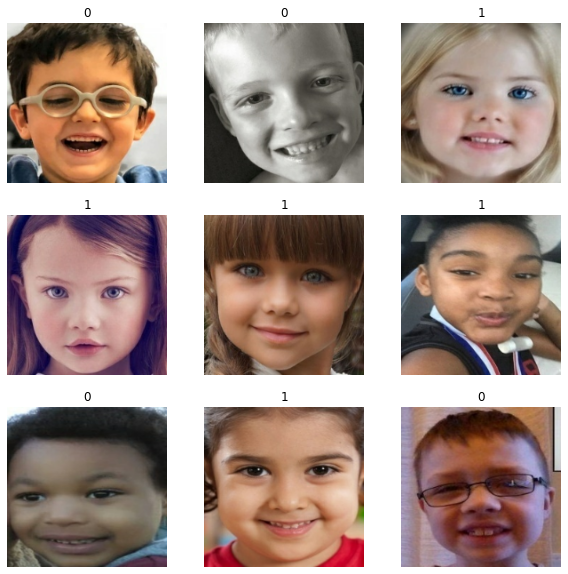

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds:
    #print(images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #print(images[i].shape)
        plt.title(int(labels[i]))
        plt.axis("off")

mobilenetv2

In [ ]:
IMG_SHAPE = (180,180, 3)

base_model = tf.keras.applications.MobileNetV2(
    alpha=0.35,
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

maxpool_layer = tf.keras.layers.GlobalMaxPooling2D()
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')

model = tf.keras.Sequential([
    base_model,
    maxpool_layer,
    prediction_layer
])
learning_rate = 0.001

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
              loss='binary_crossentropy',
              metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
num_epochs = 35
steps_per_epoch = round(2349)//batch_size
val_steps = 20
mh=model.fit(train_ds.repeat(),
          epochs=num_epochs,
          steps_per_epoch = steps_per_epoch,
          validation_data=val_ds.repeat(), 
          validation_steps=val_steps)

Epoch 1/35
73/73 [==============================] - 13s 90ms/step - loss: 0.9045 - accuracy: 0.6033 - val_loss: 0.8017 - val_accuracy: 0.6500
Epoch 2/35
73/73 [==============================] - 5s 67ms/step - loss: 0.5802 - accuracy: 0.7254 - val_loss: 0.9455 - val_accuracy: 0.5500
Epoch 3/35
73/73 [==============================] - 5s 68ms/step - loss: 0.5034 - accuracy: 0.7635 - val_loss: 1.0377 - val_accuracy: 0.5000
Epoch 4/35
73/73 [==============================] - 5s 66ms/step - loss: 0.4559 - accuracy: 0.7931 - val_loss: 0.9106 - val_accuracy: 0.6000
Epoch 5/35
73/73 [==============================] - 5s 70ms/step - loss: 0.4068 - accuracy: 0.8294 - val_loss: 0.8977 - val_accuracy: 0.5000
Epoch 6/35
73/73 [==============================] - 5s 68ms/step - loss: 0.3802 - accuracy: 0.8329 - val_loss: 0.9224 - val_accuracy: 0.5500
Epoch 7/35
73/73 [==============================] - 5s 68ms/step - loss: 0.3591 - accuracy: 0.8440 - val_loss: 1.0003 - val_accuracy: 0.5000
Epoch 8/35
7

In [ ]:
mha=mh.history['accuracy']
mhl=mh.history['loss']
mhva=mh.history['val_accuracy']
mhvl=mh.history['val_loss']

In [ ]:
model.save('model_m.h5')

In [ ]:
new_model = tf.keras.models.load_model('/gdrive/MyDrive/autism/model_mob.h5')

inceptionresnet

In [ ]:
base_model_i = tf.keras.applications.InceptionResNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

base_model_i.trainable = False

maxpool_layer = tf.keras.layers.GlobalMaxPooling2D()
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')

model_i = tf.keras.Sequential([
    base_model_i,
    maxpool_layer,
    prediction_layer
])
learning_rate = 0.001

model_i.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
              loss='binary_crossentropy',
              metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
num_epochs = 35
steps_per_epoch = round(2349)//batch_size
val_steps =20
ih=model_i.fit(train_ds.repeat(),
          epochs=num_epochs,
          steps_per_epoch = steps_per_epoch,
          validation_data=val_ds.repeat(),
          validation_steps=val_steps)

Epoch 1/35
73/73 [==============================] - 26s 213ms/step - loss: 23.5140 - accuracy: 0.5064 - val_loss: 33.7700 - val_accuracy: 0.5000
Epoch 2/35
73/73 [==============================] - 11s 151ms/step - loss: 10.6462 - accuracy: 0.5180 - val_loss: 5.6601 - val_accuracy: 0.6500
Epoch 3/35
73/73 [==============================] - 12s 163ms/step - loss: 6.4826 - accuracy: 0.5403 - val_loss: 4.5190 - val_accuracy: 0.5000
Epoch 4/35
73/73 [==============================] - 13s 172ms/step - loss: 5.3608 - accuracy: 0.5531 - val_loss: 3.6887 - val_accuracy: 0.5500
Epoch 5/35
73/73 [==============================] - 12s 170ms/step - loss: 8.4094 - accuracy: 0.5491 - val_loss: 3.4892 - val_accuracy: 0.8000
Epoch 6/35
73/73 [==============================] - 11s 156ms/step - loss: 7.8877 - accuracy: 0.5377 - val_loss: 5.0834 - val_accuracy: 0.5000
Epoch 7/35
73/73 [==============================] - 11s 153ms/step - loss: 4.0094 - accuracy: 0.5981 - val_loss: 2.7597 - val_accuracy: 0.6

In [ ]:
model_i.save('model_i.h5')

In [ ]:
iha=ih.history['accuracy']
ihl=ih.history['loss']
ihva=ih.history['val_accuracy']
ihvl=ih.history['val_loss']

CNN

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam

mod = Sequential()


mod.add(Conv2D(64,(3,3), padding='same', input_shape=(180,180,3)))
mod.add(BatchNormalization())
mod.add(Activation('relu'))
mod.add(MaxPooling2D(pool_size=(2, 2)))
mod.add(Dropout(0.25))

mod.add(Conv2D(128,(5,5), padding='same'))
mod.add(BatchNormalization())
mod.add(Activation('relu'))
mod.add(MaxPooling2D(pool_size=(2, 2)))
mod.add(Dropout(0.25))

mod.add(Conv2D(512,(3,3), padding='same'))
mod.add(BatchNormalization())
mod.add(Activation('relu'))
mod.add(MaxPooling2D(pool_size=(2, 2)))
mod.add(Dropout(0.25))

mod.add(Conv2D(512,(3,3), padding='same'))
mod.add(BatchNormalization())
mod.add(Activation('relu'))
mod.add(MaxPooling2D(pool_size=(2, 2)))
mod.add(Dropout(0.25))


mod.add(Flatten())

mod.add(Dense(256))
mod.add(BatchNormalization())
mod.add(Activation('relu'))
mod.add(Dropout(0.25))

mod.add(Dense(512))
mod.add(BatchNormalization())
mod.add(Activation('relu'))
mod.add(Dropout(0.25))

mod.add(Dense(1, activation='softmax'))

opt = Adam(lr=0.0005)
mod.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
mod.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_203 (Conv2D)         (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_203 (Ba  (None, 180, 180, 64)     256       
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 180, 180, 64)     0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 64)        0         
                                                                 
 conv2d_204 (Conv2D)         (None, 90, 90, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
num_epochs = 35
steps_per_epoch = round(2349)//batch_size
val_steps = 20
ch=mod.fit(train_ds.repeat(),
          epochs=num_epochs,
          steps_per_epoch = steps_per_epoch,
          validation_data=val_ds.repeat(), 
          validation_steps=val_steps)

Epoch 1/35
73/73 [==============================] - 20s 212ms/step - loss: 0.0000e+00 - accuracy: 0.5120 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/35
73/73 [==============================] - 12s 169ms/step - loss: 0.0000e+00 - accuracy: 0.5004 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/35
73/73 [==============================] - 12s 171ms/step - loss: 0.0000e+00 - accuracy: 0.4996 - val_loss: 0.0000e+00 - val_accuracy: 0.4500
Epoch 4/35
73/73 [==============================] - 13s 171ms/step - loss: 0.0000e+00 - accuracy: 0.5064 - val_loss: 0.0000e+00 - val_accuracy: 0.4500
Epoch 5/35
73/73 [==============================] - 13s 176ms/step - loss: 0.0000e+00 - accuracy: 0.5041 - val_loss: 0.0000e+00 - val_accuracy: 0.4500
Epoch 6/35
73/73 [==============================] - 12s 170ms/step - loss: 0.0000e+00 - accuracy: 0.5073 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 7/35
73/73 [==============================] - 12s 169ms/step - loss: 0.0000e+00 - accura

In [ ]:
mod.save('model_cnn.h5')

In [ ]:
cha=ch.history['accuracy']
chl=ch.history['loss']
chva=ch.history['val_accuracy']
chvl=ch.history['val_loss']

load test data

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/gdrive/MyDrive/autism/test_new",
     #seed=1337,
     batch_size=1,
    image_size=(180,180))
len(test_ds)

Found 100 files belonging to 2 classes.


100

mobile predict

In [ ]:
import numpy 
plt.figure(figsize=(10, 10))
ypred=[]
ytrue=[]

for images,labels in test_ds:
  #imgg=numpy.squeeze(images)
  ytrue.append(int(labels))
  predictions = new_model.predict(images)
  score = predictions[0]

  if(score<0.5):
    ypred.append(0)
  else:
    ypred.append(1)
    

"""#toimage(data).show()
    img = im.fromarray(imgg, 'RGB')
    img.save('my.png')
    img.show()"""

print(ytrue)
print(ypred)



[1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]


<Figure size 720x720 with 0 Axes>

In [ ]:
import matplotlib.image as mpimg

Text(69.0, 0.5, 'Truth')

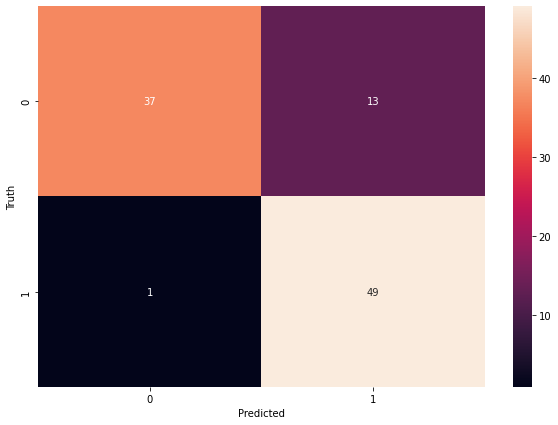

In [ ]:
import seaborn as sn
cm=tf.math.confusion_matrix(ytrue,ypred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel("Truth")

inception predict

In [ ]:
ypred_i=[]
ytrue_i=[]

for images,labels in test_ds:
  ytrue_i.append(int(labels))
  predictions = model_i.predict(images)
  score = predictions[0]
  if(score<0.5):
    ypred_i.append(0)
  else:
    ypred_i.append(1)

print(ytrue_i)
print(ypred_i)


[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]


Text(69.0, 0.5, 'Truth')

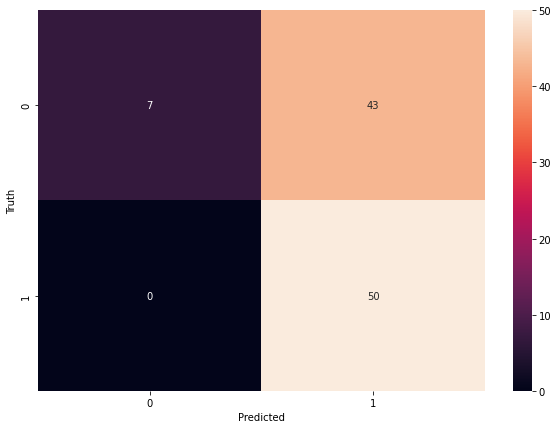

In [ ]:
import seaborn as sn
cm=tf.math.confusion_matrix(ytrue_i,ypred_i)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel("Truth")

CNN predict

In [ ]:
ypred_cnn=[]
ytrue_cnn=[]

for images,labels in test_ds:
  ytrue_cnn.append(int(labels))
  predictions = mod.predict(images)
  score = predictions[0]
  if(score<0.5):
    ypred_cnn.append(0)
  else:
    ypred_cnn.append(1)

print(ytrue_cnn)
print(ypred_cnn)

[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Text(69.0, 0.5, 'Truth')

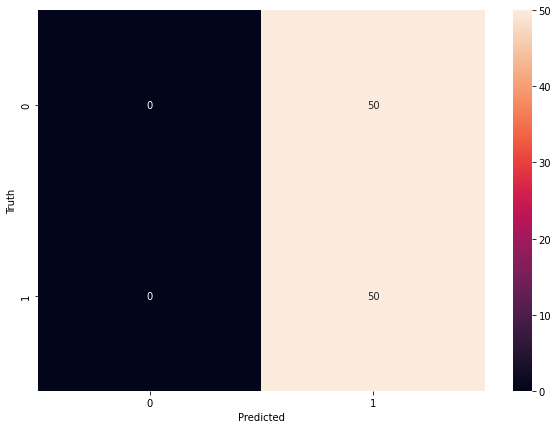

In [ ]:
import seaborn as sn
cm=tf.math.confusion_matrix(ytrue_cnn,ypred_cnn)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel("Truth")

ROC

In [ ]:
fpr, tpr, thresholds_keras = roc_curve(ytrue, ypred)
auc_keras = auc(fpr, tpr)

fpr_i, tpr_i, thresholds_keras_i = roc_curve(ytrue_i, ypred_i)
auc_i = auc(fpr_i, tpr_i)

fpr_cnn, tpr_cnn, thresholds_keras_cnn = roc_curve(ytrue_cnn, ypred_cnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)

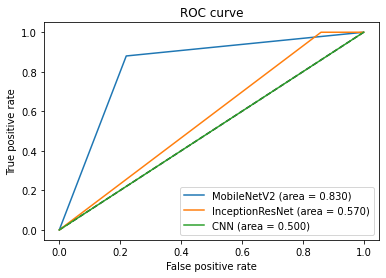

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='MobileNetV2 (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_i, tpr_i, label='InceptionResNet (area = {:.3f})'.format(auc_i))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

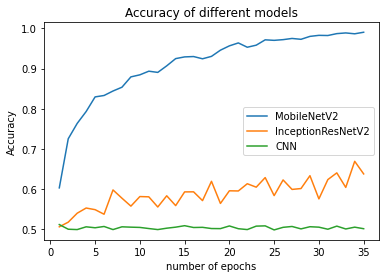

In [ ]:
x=[i for i in range(1,36)]
plt.plot(x,mha,label="MobileNetV2")
plt.plot(x,iha,label="InceptionResNetV2")
plt.plot(x,cha,label="CNN")


plt.title("Accuracy of different models")
plt.ylabel('Accuracy')
plt.xlabel("number of epochs")
plt.legend()

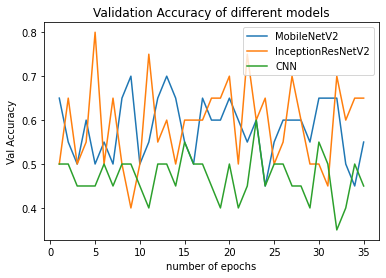

In [ ]:
x=[i for i in range(1,36)]
plt.plot(x,mhva,label="MobileNetV2")
plt.plot(x,ihva,label="InceptionResNetV2")
plt.plot(x,chva,label="CNN")


plt.title("Validation Accuracy of different models")
plt.ylabel('Val Accuracy')
plt.xlabel("number of epochs")
plt.legend()

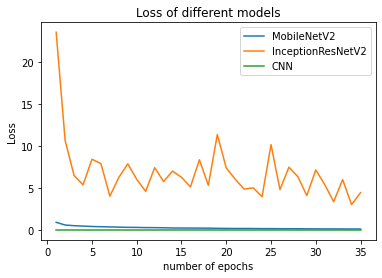

In [ ]:
x=[i for i in range(1,36)]
plt.plot(x,mhl,label="MobileNetV2")
plt.plot(x,ihl,label="InceptionResNetV2")
plt.plot(x,chl,label="CNN")


plt.title("Loss of different models")
plt.ylabel('Loss')
plt.xlabel("number of epochs")
plt.legend()

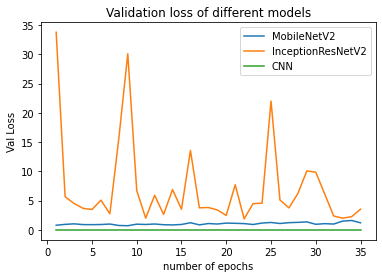

In [ ]:
x=[i for i in range(1,36)]
plt.plot(x,mhvl,label="MobileNetV2")
plt.plot(x,ihvl,label="InceptionResNetV2")
plt.plot(x,chvl,label="CNN")


plt.title("Validation loss of different models")
plt.ylabel('Val Loss')
plt.xlabel("number of epochs")
plt.legend()

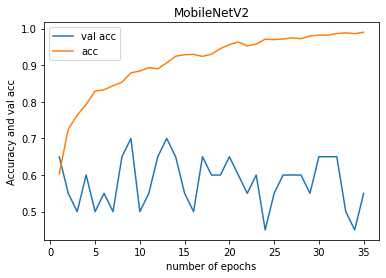

In [ ]:
x=[i for i in range(1,36)]
plt.plot(x,mhva,label="val acc")
plt.plot(x,mha,label="acc")



plt.title("MobileNetV2")
plt.ylabel('Accuracy and val acc')
plt.xlabel("number of epochs")
plt.legend()

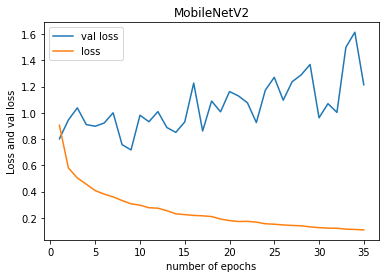

In [ ]:
x=[i for i in range(1,36)]
plt.plot(x,mhvl,label="val loss")
plt.plot(x,mhl,label="loss")



plt.title("MobileNetV2")
plt.ylabel('Loss and val loss')
plt.xlabel("number of epochs")
plt.legend()

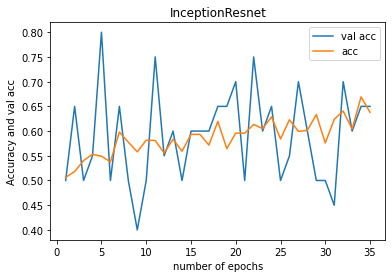

In [ ]:
x=[i for i in range(1,36)]
plt.plot(x,ihva,label="val acc")
plt.plot(x,iha,label="acc")



plt.title("InceptionResnet")
plt.ylabel('Accuracy and val acc')
plt.xlabel("number of epochs")
plt.legend()

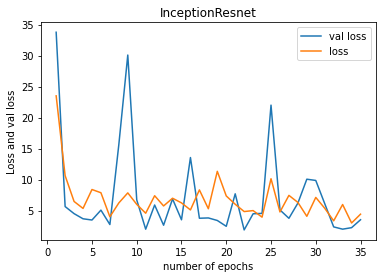

In [ ]:
x=[i for i in range(1,36)]
plt.plot(x,ihvl,label="val loss")
plt.plot(x,ihl,label="loss")



plt.title("InceptionResnet")
plt.ylabel('Loss and val loss')
plt.xlabel("number of epochs")
plt.legend()

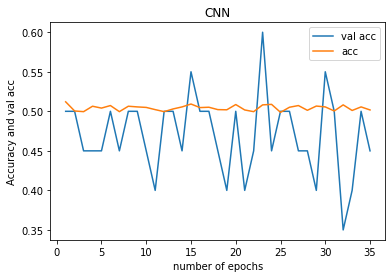

In [ ]:
x=[i for i in range(1,36)]
plt.plot(x,chva,label="val acc")
plt.plot(x,cha,label="acc")



plt.title("CNN")
plt.ylabel('Accuracy and val acc')
plt.xlabel("number of epochs")
plt.legend()

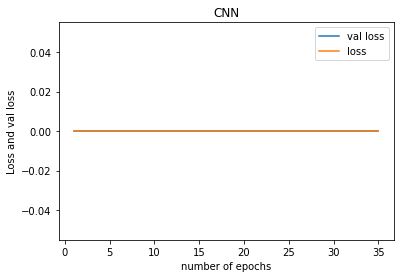

In [ ]:
x=[i for i in range(1,36)]
plt.plot(x,chvl,label="val loss")
plt.plot(x,chl,label="loss")



plt.title("CNN")
plt.ylabel('Loss and val loss')
plt.xlabel("number of epochs")
plt.legend()

In [ ]:
image_size = (180, 180)
img = keras.preprocessing.image.load_img(
    "/gdrive/MyDrive/autism/test/autistic/012.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
#print(img_array.shape)
img_array = tf.expand_dims(img_array, 0) 
#print(img_array)
predictions = new_model.predict(img_array)
score = predictions[0]
print(score)

print(
    "This image is %.2f percent autistic and %.2f percent non autistic"
    % (100 * (1 - score), 100 * score)
)

[0.01922662]
This image is 98.08 percent autistic and 1.92 percent non autistic
